<a href="https://colab.research.google.com/github/KaviniWickramasooriya/DL-Lab_02/blob/main/Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

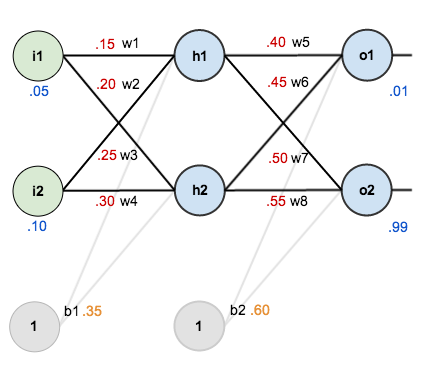

In [ ]:
from IPython.display import Image
Image("/content/image.png")

Iteration 1: Output = [[0.7569 0.7677]], Error = 0.303658
Iteration 60: Output = [[0.1352 0.8961]], Error = 0.012245
Iteration 120: Output = [[0.0853 0.9256]], Error = 0.004907
Iteration 180: Output = [[0.0666 0.9393]], Error = 0.002887
Iteration 240: Output = [[0.0564 0.9475]], Error = 0.001977
Iteration 300: Output = [[0.0497 0.9531]], Error = 0.001470
Iteration 360: Output = [[0.045  0.9572]], Error = 0.001151
Iteration 420: Output = [[0.0414 0.9603]], Error = 0.000934
Iteration 480: Output = [[0.0386 0.9628]], Error = 0.000778
Iteration 540: Output = [[0.0363 0.9649]], Error = 0.000661
Iteration 600: Output = [[0.0344 0.9667]], Error = 0.000571
Iteration 660: Output = [[0.0328 0.9681]], Error = 0.000499
Iteration 720: Output = [[0.0314 0.9694]], Error = 0.000441
Iteration 780: Output = [[0.0302 0.9706]], Error = 0.000393
Iteration 840: Output = [[0.0291 0.9716]], Error = 0.000353
Iteration 900: Output = [[0.0282 0.9725]], Error = 0.000319
Iteration 960: Output = [[0.0273 0.9733]], 

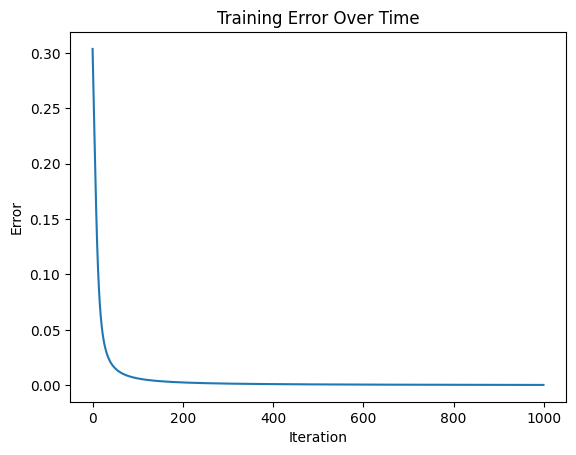

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

# -----------------------------
# Initialize network parameters
# -----------------------------
def initialize():
    X = np.array([[0.05, 0.10]])                     # Inputs
    W1 = np.array([[0.15, 0.20], [0.25, 0.30]])      # Weights for hidden layer
    b1 = 0.35                                        # Bias for hidden layer
    W2 = np.array([[0.40, 0.45], [0.50, 0.55]])      # Weights for output layer
    b2 = 0.60                                        # Bias for output layer
    Y = np.array([[0.01, 0.99]])                     # Desired output
    learning_rate = 0.5
    no_of_iter = 1000                                # Number of training iterations
    return X, W1, b1, W2, b2, Y, learning_rate, no_of_iter

# -----------------------------
# Forward pass
# -----------------------------
def forward_pass(X, W1, b1, W2, b2, Y):
    Z1 = np.dot(X, W1) + b1
    A1 = 1 / (1 + np.exp(-Z1))                       # Sigmoid activation

    Z2 = np.dot(A1, W2) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    E = np.sum(0.5 * np.square(Y - A2))              # Squared error
    return A1, A2, E

# -----------------------------
# Backpropagation
# -----------------------------
def back_propagation(X, W1, b1, W2, b2, Y, A1, A2, learning_rate):
    # Output layer error
    dA2 = -(Y - A2)
    dZ2 = dA2 * (A2 * (1 - A2))
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 * (1 - A1))
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Weight updates
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    return W1, b1, W2, b2

# -----------------------------
# Training loop
# -----------------------------
def main():
    X, W1, b1, W2, b2, Y, learning_rate, no_of_iter = initialize()
    errors = []

    for i in range(no_of_iter):
        A1, A2, E = forward_pass(X, W1, b1, W2, b2, Y)
        W1, b1, W2, b2 = back_propagation(X, W1, b1, W2, b2, Y, A1, A2, learning_rate)
        errors.append(E)

        if (i+1) % 60 == 0 or i == 0:
            print(f"Iteration {i+1}: Output = {A2}, Error = {E:.6f}")

    # Final results
    print("\nFinal Output:", A2)
    print("Desired Output:", Y)
    print("Final Error:", E)

    # Plot error over time
    plt.plot(errors)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Training Error Over Time")
    plt.show()

main()

In [ ]:
def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for i in range(no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
        print(f"Iteration {i+1}: Output = {A2}, Error = {E}")

